OMARA WALDEA


STEPS TAKEN IN THE ANALYSIS

1. Read the CSV files containing the Chicago traffic crash data.  Identify the column common to both files and merge them together on that column.  Then display the total number of reported crashes.
2. Change the ‘CRASH_DATE’ column to a date format.  Drop observations that did not occur in 2017, 2018 or 2019 (other years have incomplete data).
3. Display a plot showing the number of crashes that occur for each hour of the day.
4. Name the make of vehicle that was involved in the most daylight crashes in August 2018.  Remember that a crash can involve multiple vehicles.
5. Determine which weather condition was most prevalent for each type of crash.
6. Plot the primary contributing cause of reported crashes, from highest to lowest.
7. Display the 10 state license plates involved in the most crashes.  Remember that a crash can involve multiple vehicles.
8. Display the proportion of crashes in each month of 2019 where alcohol was determined to be the primary contributing cause.
9. Determine whether snowmobiles or recreational off-highway vehicles were involved in more crashes.
10. Display a cluster map showing the locations of crashes involving a hit and run.

Step 1: Open the CSV files that contain the Chicago traffic crash data.  Identify the column that both files have in common and merge them on that column.  Then show the overall number of reported crashes.  Throughout this project, we will need to use both the merged and crashed DataFrames.

In [1]:
import pandas as pd

# Import the source data and merge.
df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes_20240830.csv', low_memory=False)
df_vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles_20240830.csv', low_memory=False).drop('CRASH_DATE', axis=1)
df = pd.merge(df_crashes, df_vehicles, on='CRASH_RECORD_ID').reset_index()

# Display the total number of crashes.
print('Total Number of Reported Crashes:', df['CRASH_RECORD_ID'].nunique())

Total Number of Reported Crashes: 30244


In [65]:
df.head()

index                                    CRASH_RECORD_ID CRASH_DATE_EST_I  \
58     58  01fbc58e11f4eba98b3aabefcc26c9a8247ee52844059a...                Y   
59     59  01fbc58e11f4eba98b3aabefcc26c9a8247ee52844059a...                Y   
69     69  02b7a24181603c177ec38cd0e1439fe9e80f23200d91da...              NaN   
70     70  02b7a24181603c177ec38cd0e1439fe9e80f23200d91da...              NaN   
84     84  044802edff78b91b87c91d999b59af59986534a5ec71f5...              NaN   

            CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
58 2020-12-17 16:00:00                20.0            NO CONTROLS   
59 2020-12-17 16:00:00                20.0            NO CONTROLS   
69 2020-12-11 00:29:00                30.0         TRAFFIC SIGNAL   
70 2020-12-11 00:29:00                30.0         TRAFFIC SIGNAL   
84 2020-12-27 18:16:00                30.0         TRAFFIC SIGNAL   

        DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
58           NO CONTROLS             CLEAR                DAYLIGHT   
59           NO CONTROLS             CLEAR                DAYLIGHT   
69  FUNCTIONING PROPERLY             CLEAR  DARKNESS, LIGHTED ROAD   
70  FUNCTIONING PROPERLY             CLEAR  DARKNESS, LIGHTED ROAD   
84  FUNCTIONING PROPERLY             CLEAR                    DAWN   

        FIRST_CRASH_TYPE  ... TRAILER2_LENGTH  TOTAL_VEHICLE_LENGTH AXLE_CNT  \
58  PARKED MOTOR VEHICLE  ...             NaN                   NaN      NaN   
59  PARKED MOTOR VEHICLE  ...             NaN                   NaN      NaN   
69               TURNING  ...             NaN                   NaN      NaN   
70               TURNING  ...             NaN                   NaN      NaN   
84                 ANGLE  ...             NaN                   NaN      NaN   

   VEHICLE_CONFIG CARGO_BODY_TYPE LOAD_TYPE HAZMAT_OUT_OF_SERVICE_I  \
58            NaN             NaN       NaN                     NaN   
59            NaN             NaN       NaN                     NaN   
69            NaN             NaN       NaN                     NaN   
70            NaN             NaN       NaN                     NaN   
84            NaN             NaN       NaN                     NaN   

   MCS_OUT_OF_SERVICE_I HAZMAT_CLASS Hour  
58                  NaN          NaN   16  
59                  NaN          NaN   16  
69                  NaN          NaN    0  
70                  NaN          NaN    0  
84                  NaN          NaN   18  

[5 rows x 119 columns]

Drop duplicates to eliminate and avoid skewed results

In [64]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [63]:
df.info()  
df.isna() 
df.isnull()

<class 'pandas.core.frame.DataFrame'>
Index: 4486 entries, 58 to 61542
Columns: 119 entries, index to Hour
dtypes: datetime64[ns](1), float64(27), int32(1), int64(1), object(89)
memory usage: 4.1+ MB


index  CRASH_RECORD_ID  CRASH_DATE_EST_I  CRASH_DATE  \
58     False            False             False       False   
59     False            False             False       False   
69     False            False              True       False   
70     False            False              True       False   
84     False            False              True       False   
...      ...              ...               ...         ...   
61483  False            False              True       False   
61529  False            False              True       False   
61530  False            False              True       False   
61541  False            False              True       False   
61542  False            False              True       False   

       POSTED_SPEED_LIMIT  TRAFFIC_CONTROL_DEVICE  DEVICE_CONDITION  \
58                  False                   False             False   
59                  False                   False             False   
69                  False                   False             False   
70                  False                   False             False   
84                  False                   False             False   
...                   ...                     ...               ...   
61483               False                   False             False   
61529               False                   False             False   
61530               False                   False             False   
61541               False                   False             False   
61542               False                   False             False   

       WEATHER_CONDITION  LIGHTING_CONDITION  FIRST_CRASH_TYPE  ...  \
58                 False               False             False  ...   
59                 False               False             False  ...   
69                 False               False             False  ...   
70                 False               False             False  ...   
84                 False               False             False  ...   
...                  ...                 ...               ...  ...   
61483              False               False             False  ...   
61529              False               False             False  ...   
61530              False               False             False  ...   
61541              False               False             False  ...   
61542              False               False             False  ...   

       TRAILER2_LENGTH  TOTAL_VEHICLE_LENGTH  AXLE_CNT  VEHICLE_CONFIG  \
58                True                  True      True            True   
59                True                  True      True            True   
69                True                  True      True            True   
70                True                  True      True            True   
84                True                  True      True            True   
...                ...                   ...       ...             ...   
61483             True                  True      True            True   
61529             True                  True      True            True   
61530             True                  True      True            True   
61541             True                  True      True            True   
61542             True                  True      True            True   

       CARGO_BODY_TYPE  LOAD_TYPE  HAZMAT_OUT_OF_SERVICE_I  \
58                True       True                     True   
59                True       True                     True   
69                True       True                     True   
70                True       True                     True   
84                True       True                     True   
...                ...        ...                      ...   
61483             True       True                     True   
61529             True       True                     True   
61530             True       True                     True   
61541             True       True  

In [67]:
# drop null values
df = df.dropna(axis = 0, how = "any", subset = None) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 105 entries, index to Hour
dtypes: datetime64[ns](1), float64(24), int32(1), int64(1), object(78)
memory usage: 0.0+ bytes


Step 2: Set the 'CRASH_DATE' column to a date format.  Drop observations that did not occur in 2017, 2018, or 2019 (earlier years' data is lacking).  Do this for both merged and crashed DataFrames.

In [2]:
# Change the CRASH_DATE column to date data type.
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])

# Subset DataFrame to include only crashes from 2018, 2019 and 2020, because other years contain only partial data.
df = df[(df['CRASH_DATE'] >= '2018-01-01') & (df['CRASH_DATE'] <= '2020-12-31')]
df_crashes = df_crashes[(df_crashes['CRASH_DATE'] >= '2018-01-01') & (df_crashes['CRASH_DATE'] <= '2020-12-31')]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22932\4139120760.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22932\4139120760.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])


For conversion of the CRASH_DATE columns to a date type we use the pandas function to_datetime(), passing the columns to change as a parameter. 


Step 3: Plot showing the number of crashes that occur every hour of each day

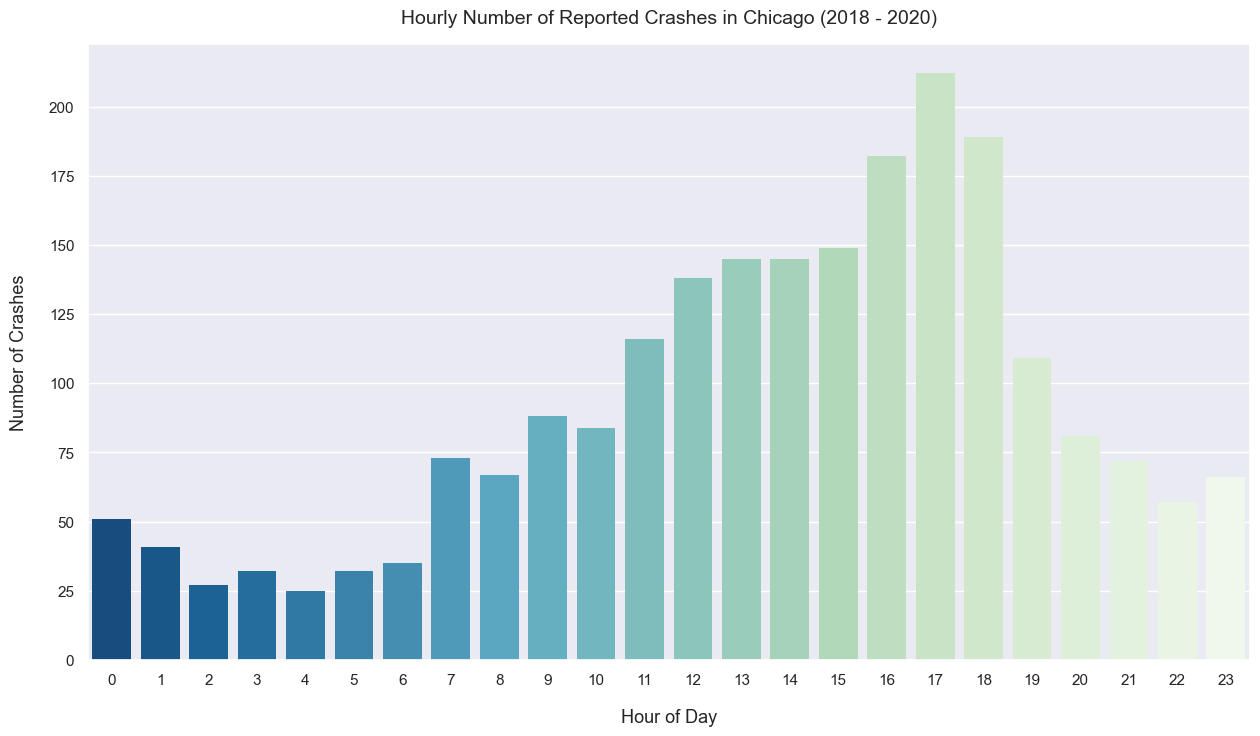

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set_theme(style='darkgrid')
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Add column containing hour of day that crash occured.
df['Hour'] = df['CRASH_DATE'].dt.hour

# Plot number of crashes by hour of day.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df.groupby('Hour')['CRASH_RECORD_ID'].nunique().reset_index(), x='Hour', y='CRASH_RECORD_ID', palette='GnBu_r', linewidth=0)
s.set_title('Hourly Number of Reported Crashes in Chicago (2018 - 2020)', y=1.02, fontsize=14)
s.set_xlabel('Hour of Day', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

The contents of the matplotlib  and seaborn libraries available to our program. matplotlib and seaborn work together for creating visualizations in Python. This makes plotting easier and appealing.

Specify the plot size as 15 x 8, and then run seaborn's barplot() method.  We pass it five parameters, which we shall use in turn.  The first argument is the data we want to plot: we group the records by our new Hour column and count the number of unique CRASH_RECORD_IDs in each group using the nunique() method.  The second and third parameters are the plot's x and y, which are the hour and crash count, respectively.  The fourth argument determines the color palette, and the fifth specifies no line around the bars, which is a stylistic preference.

Step 4: Identify the make of car involved in the most daytime crashes in August 2018.  Remember that a collision can include many automobiles.

In [5]:
# Subset the DataFrame for crashes that occurred during daylight.
df_daylight = df[df['LIGHTING_CONDITION'] == 'DAYLIGHT']

# Determine the make of vehicle involved in the most crashes.
df_daylight['MAKE'].value_counts().nlargest(1)

MAKE
CHEVROLET    232
Name: count, dtype: int64

Step 5: Determine the weather condition prevalent for each crash

In [6]:
df_crashes.groupby('FIRST_CRASH_TYPE')['WEATHER_CONDITION'].apply(lambda x: x.value_counts().head(1)).reset_index(name='COUNT').rename(columns={'level_1': 'WEATHER'})

FIRST_CRASH_TYPE  ANGLE  COUNT
0                          ANGLE  CLEAR   7488
1                         ANIMAL  CLEAR     62
2                   FIXED OBJECT  CLEAR   3287
3                        HEAD ON  CLEAR    538
4             OTHER NONCOLLISION  CLEAR    243
5                   OTHER OBJECT  CLEAR    676
6                     OVERTURNED  CLEAR     45
7           PARKED MOTOR VEHICLE  CLEAR  15411
8                   PEDALCYCLIST  CLEAR   1131
9                     PEDESTRIAN  CLEAR   1739
10                      REAR END  CLEAR  15751
11                 REAR TO FRONT  CLEAR    581
12                  REAR TO REAR  CLEAR    133
13                  REAR TO SIDE  CLEAR    348
14  SIDESWIPE OPPOSITE DIRECTION  CLEAR    975
15      SIDESWIPE SAME DIRECTION  CLEAR  10739
16                         TRAIN  CLEAR      3
17                       TURNING  CLEAR  10106

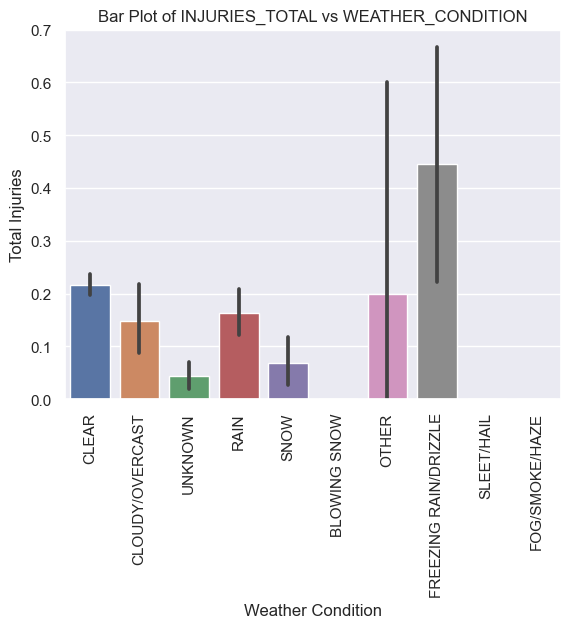

In [62]:
weather_conditions = df['WEATHER_CONDITION'].unique()
sns.barplot(x='WEATHER_CONDITION', y='INJURIES_TOTAL', data=df)
plt.xlabel('Weather Condition')
plt.ylabel('Total Injuries')
plt.title('Bar Plot of INJURIES_TOTAL vs WEATHER_CONDITION')
plt.xticks(range(len(weather_conditions)), weather_conditions, rotation=90)
plt.show()

Step 6: Plot the primary contributing cause of reported crashes, from highest to lowest.

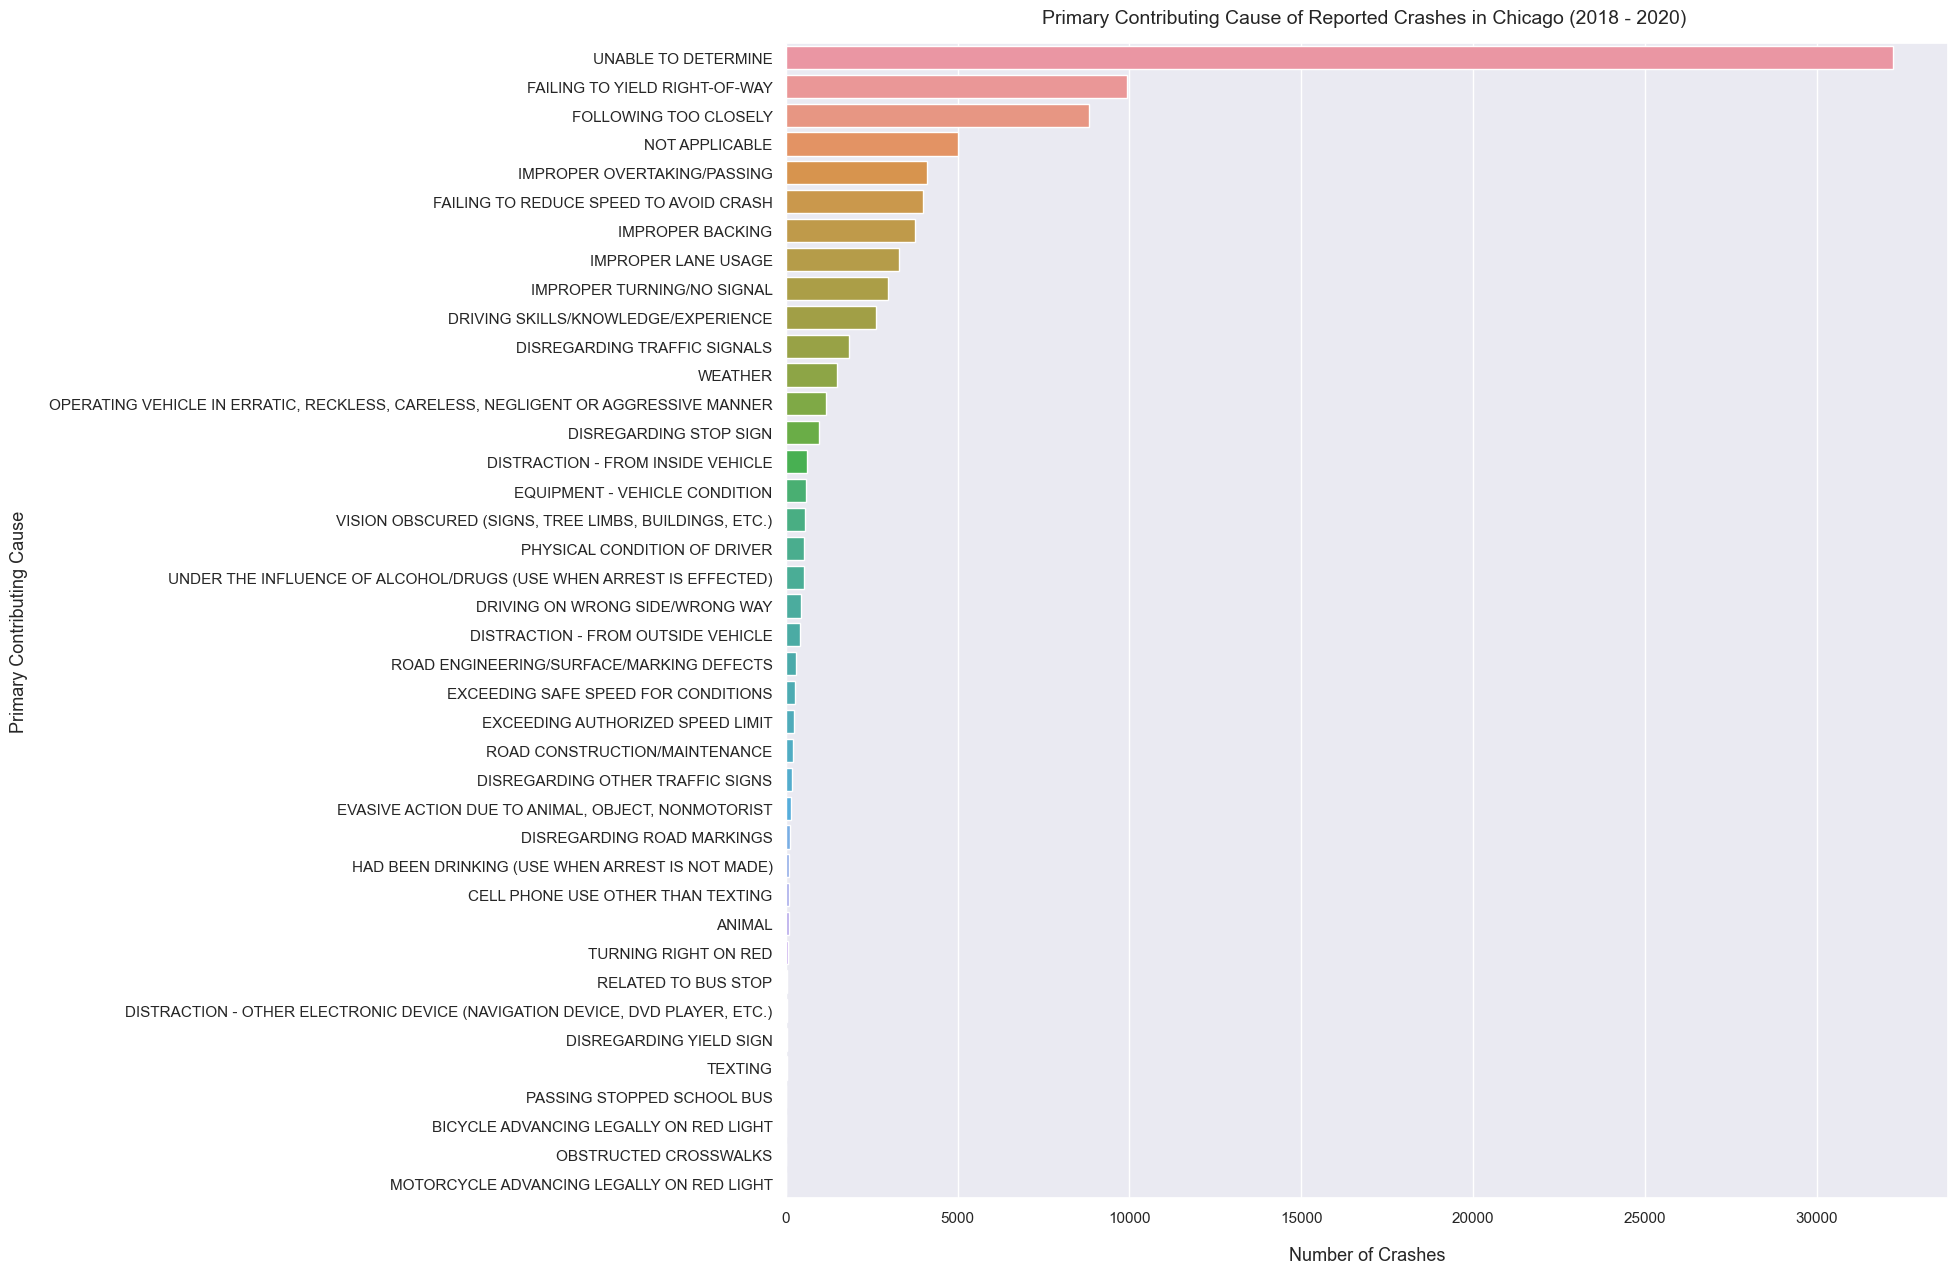

In [7]:
# Display a plot showing the primary contributing cause of reported crashes.
plt.figure(figsize=(15, 15))
sns.countplot(data=df_crashes,  y='PRIM_CONTRIBUTORY_CAUSE', order = df_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.title('Primary Contributing Cause of Reported Crashes in Chicago (2018 - 2020) ', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=13, labelpad=15)
plt.show();

Step 7. Display the 10 state license plates involved in the most crashes.  Remember that a crash can involve multiple vehicles.

In [8]:
df.groupby('LIC_PLATE_STATE')['VEHICLE_ID'].count().nlargest(10).reset_index(name='COUNT')

LIC_PLATE_STATE  COUNT
0              IL   3643
1              IN     91
2              XX     43
3              WI     26
4              FL     23
5              MI     17
6              TX     13
7              OH     12
8              AZ     11
9              IA     11

Step 8. Display the proportion of crashes in each month of 2019 where alcohol was determined to be the primary contributing cause.

In [9]:
# Subset to crashes reported in 2019 and count number of crashes per month.
df_alcohol = df_crashes[(df_crashes['CRASH_DATE'] >= '2019-01-01') & (df_crashes['CRASH_DATE'] <= '2019-12-31')]
df_total = df_alcohol.groupby(df_alcohol['CRASH_DATE'].dt.strftime('%m'))['CRASH_RECORD_ID'].nunique()

# Subset to crashes with alcohol as the primary contributing cause and count number per month.
df_alcohol = df_crashes[df_crashes['PRIM_CONTRIBUTORY_CAUSE'].str.contains('ALCOHOL|DRINKING')]
df_alcohol = df_alcohol.groupby(df_alcohol['CRASH_DATE'].dt.strftime('%m'))['CRASH_RECORD_ID'].nunique()

# Calculate the porportions and display a well formatted result.
df_proportion = df_alcohol / df_total * 100
df_proportion.reset_index().rename(columns={'CRASH_DATE': 'MONTH', 'CRASH_RECORD_ID': 'PROPORTION'})

MONTH  PROPORTION
0     01    1.633466
1     02    1.812555
2     03    1.673152
3     04    2.231793
4     05    1.646091
5     06    1.596668
6     07    1.968232
7     08    1.923802
8     09    2.679568
9     10    2.473908
10    11    2.074529
11    12    2.455997

Step 9. Determine whether snowmobiles or recreational off-highway vehicles were involved in more crashes.

In [ ]:
print('Number of snowmobiles:', str(len(df[df['VEHICLE_TYPE'] == 'SNOWMOBILE'])))

Number of snowmobiles: 0


In [ ]:
print('Number of recreational off-highway vehicles:', str(len(df[df['VEHICLE_TYPE'] == 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)'])))

Number of recreational off-highway vehicles: 0


Step 10. Display a cluster map showing the locations of crashes involving a hit and run.

In [ ]:
# Subset to crashes involving a hit and run and drop records without location coordinates.
df_hitrun = df_crashes[df_crashes['HIT_AND_RUN_I'] == 'Y']
df_hitrun = df_hitrun[df_hitrun['LONGITUDE'].notna()]

In [ ]:
import folium
from folium import plugins
from IPython.display import display

# Create a map centered on Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# Instantiate a marker cluster object for hit-and-run crashes
hitrun = plugins.MarkerCluster().add_to(m)

# Display only crashes where hit and run was reported
for lat, lng in zip(df_hitrun['LATITUDE'], df_hitrun['LONGITUDE']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(hitrun)

# Display the map inline
display(m)


To display the locations of crashes involving hit and runs, we first subset *df_crashes* to obtain the data we want to plot, and then store the result as *df_hitrun*.  Some records in the DataFrame lack coordinates, therefore we eliminate them using the notna() method.

To display our map, we'll be using Folium and a related marker cluster plugin. We begin by making the contents of the Folium module available to our software and importing the plugins.  Folium is a sophisticated tool that requires little code to generate an interactive map with amazing detail.

Create a Folium map by passing the GPS coordinates of Chicago and a zoom level of 12.  

